In [2]:
import grab

In [3]:
catalog_url = "https://en.wikipedia.org/wiki/Lists_of_musicians"

In [4]:
from grab import Grab
g = Grab(log_file='grab.html')


In [5]:
doc = g.go(catalog_url)

lists = doc.select("//a[starts-with(text(),'List of')]")
links = map( lambda ls: "https://en.wikipedia.org"+ ls.node().attrib["href"], lists)


In [6]:
person_links = []
person_categories = []
for i, link in enumerate(links):
    doc_list = g.go(link)
    hrefs = doc_list.select("//a")

    for href in hrefs:
        attrs = href.node().attrib
        if 'href' not in attrs:
            continue
        if not attrs['href'].startswith("/wiki/"):
            continue
        person_links.append("https://en.wikipedia.org"+attrs['href'])
        person_categories.append(link)
    if i%10 ==0:
        print i, '/',len(links)

0 / 460
10 / 460
20 / 460
30 / 460
40 / 460
50 / 460
60 / 460
70 / 460
80 / 460
90 / 460
100 / 460
110 / 460
120 / 460
130 / 460
140 / 460
150 / 460
160 / 460
170 / 460
180 / 460
190 / 460
200 / 460
210 / 460
220 / 460
230 / 460
240 / 460
250 / 460
260 / 460
270 / 460
280 / 460
290 / 460
300 / 460
310 / 460
320 / 460
330 / 460
340 / 460
350 / 460
360 / 460
370 / 460
380 / 460
390 / 460
400 / 460
410 / 460
420 / 460
430 / 460
440 / 460
450 / 460


In [10]:
from selenium import webdriver as wd
import time

def get_infobox_attrs(wd,url,table_name = "infobox"):
    wd.get(url)
    time.sleep(0.5)
    table = wd.find_element_by_xpath("//table[starts-with(@class, '"+table_name+"')]")
    rows = table.find_elements_by_xpath("//tr")
    attrs = {}
    for row in rows:
        try:
            key = row.find_element_by_tag_name("th").text.lower()
            val = row.find_element_by_tag_name("td").text.lower()
            if "v t e" in key or "[show]" in key:
                continue
            if len(key) > 30:
                continue
            attrs[key]= val
        except:
            pass
    return attrs

In [11]:
from sklearn.externals import joblib


import json


def _scrape_batch(urls,list_labels,output_fname = "./musicians0.json"):
    
    fox = wd.Firefox()

    url_attrs = {}

    for i,(page_url,list_label) in enumerate(zip(urls,list_labels)):

        try:
            attrs = get_infobox_attrs(fox,page_url)
            attrs["_page_url"] = page_url
            attrs["_list"] = list_label
            
            url_attrs[page_url] = attrs
            
            #print "succeeded for",page_url
        except:
            #print "failed for", page_url
            pass
        if i%500==0:
            print i,'/',len(urls)
        
        
    fox.close()
    with open(output_fname,'w') as fout:
        json.dump(url_attrs,fout)
    
    
    return True


In [ ]:
n_batches = 16

tasks = [ 
    joblib.delayed(_scrape_batch)(person_links[batch_i::n_batches],
                person_categories[batch_i::n_batches],
                "large_musicians%i.json"%batch_i)
 for batch_i in range(n_batches)]

res = joblib.Parallel(n_jobs=4)(tasks)

In [52]:
with open("./musicians0.json") as fin:
    js = json.load(fin)

In [2]:
import os
import json
shards_names  =filter(lambda x: x.endswith(".json"), os.listdir("."))

In [10]:
from collections import Counter
attr_freq = Counter()
list_freq = Counter()


for fname in shards_names:
    with open(fname) as fin:
        jsdict = json.load(fin)
        for person_url, attrs in jsdict.items():
            for attr,val in attrs.items():
                attr_freq[attr[:15].lower()]+=1
            list_freq[attrs["_list"].split('/')[-1]]+=1
            

In [11]:
#list_freq.most_common()
columns_freqs = attr_freq.most_common(1000)
columns = [tpl[0] for tpl in columns_freqs]
import numpy as np
import pandas as pd

In [13]:
rows = []
targets = []
for fname in shards_names:
    with open(fname) as fin:
        jsdict = json.load(fin)
        for person_url, attrs in jsdict.items():
            attr_names = map(lambda x:x[:15].lower(), attrs.keys())
            row = map( lambda col: col in attr_names,columns)
            row = np.array(row,dtype=bool)
            rows.append(row)
            targets.append(attrs['_list'].split("/")[-1])

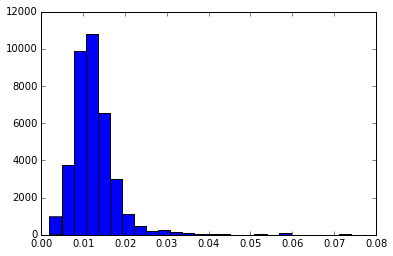

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

_= plt.hist(map(np.mean,rows),bins=25)


In [16]:
df = pd.DataFrame(rows,columns=columns)
del rows
is_leadvoc = np.array(targets) == 'List_of_lead_vocalists'
Counter(y).most_common(10)

NameError: name 'rows' is not defined

In [19]:
y = np.array(targets)

In [17]:
(np.mean(df.values,axis=1) >0.005).sum()

36147

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
Xtr,Xts,Ytr,Yts = train_test_split(df.values,y)

In [ ]:
model = RandomForestClassifier(n_estimators=1000,n_jobs=-1).fit(Xtr,Ytr)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print roc_auc_score(Ytr,model.predict_proba(Xtr)[:,1])
print roc_auc_score(Yts,model.predict_proba(Xts)[:,1])

In [ ]:
import json
with open("musicians.json",'w') as fout:
    json.dump(url_attrs,fout)

In [5]:

list_of_states = doc.select("//ol")[0].select("//a")

pageurls = []
for h in list_of_states:
    n = h.node()
    if not 'href' in n.attrib:
        continue
    href = n.attrib['href']
    if not href.startswith("/wiki"):
        continue
    pageurls.append("https://ru.wikipedia.org"+href)

In [73]:
print person_links[300]
get_infobox_attrs(person_links[300])

https://en.wikipedia.org/wiki/Mike_Doughty
//table[contains(@class, 'infobox vcard plainlist')]


{u'2002 Smofe + Smang': u" Live in Minneapolis \u2212 \u2212 self-released Live album recorded at the Woman's Club Theater in Minneapolis on February 27, 2002. Release in a limited edition of 2500.",
 'Live albums Smofe + Smang': ' Live in Mpls. Busking The Question Jar Show',
 'v t e Mike Doughty Studio albums Skittish Haughty Melodic Golden Delicious Sad Man Happy Man Yes and Also Yes The Flip Is Another Honey EPs Rockity Roll The Gambler EP Half Smofe Busking EP Fort Hood E.P. Live albums Smofe + Smang': ' Live in Mpls. Busking The Question Jar Show Singles "Looking at the World from the Bottom of a Well" "27 Jennifers" "(You Should Be) Doubly (Gratified)" Compilations Skittish / Rockity Roll Written Works Slanky The Book of Drugs Related Topics Soul Coughing New York Press'}

In [13]:
url_attrs = {}
for page_url in pageurls:
        
    try:
        attrs = get_infobox_attrs(page_url)
        url_attrs[page_url] = attrs
        #print "succeeded for",page_url
    except:
        #print "failed for", page_url
        pass

In [25]:
for k,v in url_attrs.values()[10].items():
    print k,'<-',v

См. также <-  Датская колонизация Америки • Датская работорговля[da] • Скандинавский колониализм • Королевство Дании
Гимн <-  Nunarput utoqqarsuanngoravit
Антигуа и Барбуда | Багамские Острова | Барбадос | Белиз | Гаити | Гватемала | Гондурас | Гренада | Доминика | Доминиканская Республика | Канада | Коста-Рика | Куба | Мексика | Никарагуа | Панама | Сальвадор | Сент-Люсия | Сент-Винсент и Гренадины | Сент-Китс и Невис | США | Тринидад и Тобаго | Ямайка Зависимые территории <-  Американские Виргинские острова | Ангилья | Аруба | Бермудские Острова | Бонэйр, Синт-Эстатиус и Саба | Британские Виргинские острова | Гваделупа | Гренландия | Острова Кайман | Клиппертон | Кюрасао | Мартиника | Монтсеррат | Навасса | Пуэрто-Рико | Сан-Андрес-и-Провиденсия | Сен-Бартелеми | Сен-Мартен | Сен-Пьер и Микелон | Синт-Мартен | Теркс и Кайкос | Федеральные владения Венесуэлы
Координаты <-  72°27′00″ с. ш. 40°30′00″ з. д.﻿ / ﻿72.45000° с. ш. 40.50000° з. д.﻿ / 72.45000; -40.50000 (G) (O)


Дата рождения  14 марта 1879(1879-03-14)[1][2][3]
Место рождения  Ульм, Королевство Вюртемберг, Германская империя
Дата смерти  18 апреля 1955(1955-04-18)[4][3] (76 лет)
Место смерти  Принстон, Нью-Джерси, США
Страна  Германия Германия (1879—1896, 1914—1933) апатрид (1896—1901) Швейцария Швейцария (с 1901) США США (1940—1955)
Научная сфера  теоретическая физика
Место работы  Патентное бюро в Берне, Цюрихский университет, Карлов университет, Институт Кайзера Вильгельма, Лейденский университет, Институт фундаментальных исследований
Альма-матер  Высшая техническая школа Цюриха
Научный руководитель  Альфред Кляйнер
Известен как  создатель общей и специальной теорий относительности
Награды и премии  Нобелевская премия по физике (1921) Медаль Барнарда (1921) Медаль Маттеуччи (1921) Медаль Копли (1925) Золотая медаль Королевского астрономического общества (1926) Медаль Планка (1929) Премия Жюля Жансена (1931) Гиббсовская лекция (1934) Медаль Франклина (1935)
Подпись 


In [18]:
class ScraperParser(HTMLParser.HTMLParser):
    def __init__(self):
        HTMLParser.HTMLParser.__init__(self)
        self.recording = 0
        self.data = []

    def handle_starttag(self, tag, attributes):
        if tag != 'table':
            return
        if self.recording:
            self.recording += 1
            return
        for name, value in attributes:
            if name == 'class' and value == 'infobox vcard':
                break
        else:
            return
        self.recording = 1

    def handle_endtag(self, tag):
        if tag == 'div' and self.recording:
            self.recording -= 1

    def handle_data(self, data):
        if self.recording:
            self.data.append(data)

In [24]:
page_html  = urllib.urlopen(url).read().decode('utf8')
sp = ScraperParser()
sp.feed(page_html)

In [26]:
sp.close()